In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- key column: data_block_id (일 단위)

# train.csv

### 기본적인 정보 확인

In [2]:
df = pd.read_csv("../../../estsoft/data/train.csv")

In [3]:
df.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [4]:
df.tail()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60
2018351,15,1,3,196.240,1,2023-05-31 23:00:00,637,2018351,60


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   county              int64  
 1   is_business         int64  
 2   product_type        int64  
 3   target              float64
 4   is_consumption      int64  
 5   datetime            object 
 6   data_block_id       int64  
 7   row_id              int64  
 8   prediction_unit_id  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 138.6+ MB


In [6]:
df.isnull().sum()

county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

In [7]:
df.describe()

,county,is_business,product_type,target,is_consumption,data_block_id,row_id,prediction_unit_id
count,2.018352e+06,2.018352e+06,2.018352e+06,2.017824e+06,2018352.0,2.018352e+06,2.018352e+06,2.018352e+06
mean,7.297034e+00,5.368261e-01,1.898927e+00,2.748556e+02,0.5,3.218746e+02,1.009176e+06,3.304538e+01
std,4.780990e+00,4.986421e-01,1.081766e+00,9.095024e+02,0.5,1.826343e+02,5.826482e+05,1.959059e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,1.000000e+00,3.780000e-01,0.0,1.660000e+02,5.045878e+05,1.600000e+01
50%,7.000000e+00,1.000000e+00,2.000000e+00,3.113300e+01,0.5,3.230000e+02,1.009176e+06,3.300000e+01
75%,1.100000e+01,1.000000e+00,3.000000e+00,1.802062e+02,1.0,4.790000e+02,1.513763e+06,5.000000e+01
max,1.500000e+01,1.000000e+00,3.000000e+00,1.548027e+04,1.0,6.370000e+02,2.018351e+06,6.800000e+01


### 인덱스 변경

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   county              int64         
 1   is_business         int64         
 2   product_type        int64         
 3   target              float64       
 4   is_consumption      int64         
 5   datetime            datetime64[ns]
 6   data_block_id       int64         
 7   row_id              int64         
 8   prediction_unit_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 138.6 MB


In [9]:
df.index = df['datetime']
df.index

DatetimeIndex(['2021-09-01 00:00:00', '2021-09-01 00:00:00',
               '2021-09-01 00:00:00', '2021-09-01 00:00:00',
               '2021-09-01 00:00:00', '2021-09-01 00:00:00',
               '2021-09-01 00:00:00', '2021-09-01 00:00:00',
               '2021-09-01 00:00:00', '2021-09-01 00:00:00',
               ...
               '2023-05-31 23:00:00', '2023-05-31 23:00:00',
               '2023-05-31 23:00:00', '2023-05-31 23:00:00',
               '2023-05-31 23:00:00', '2023-05-31 23:00:00',
               '2023-05-31 23:00:00', '2023-05-31 23:00:00',
               '2023-05-31 23:00:00', '2023-05-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=2018352, freq=None)

### categorical column의 데이터 분포 확인

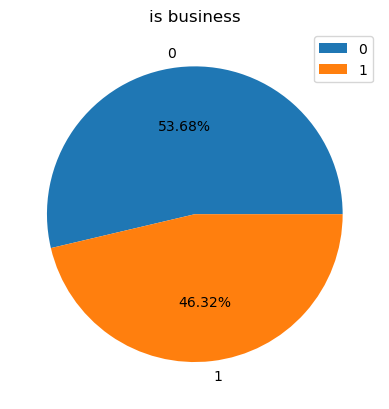

In [10]:
plt.pie(df['is_business'].value_counts(), labels=df['is_business'].unique(), autopct='%.2f%%')
plt.title('is business')
plt.legend()

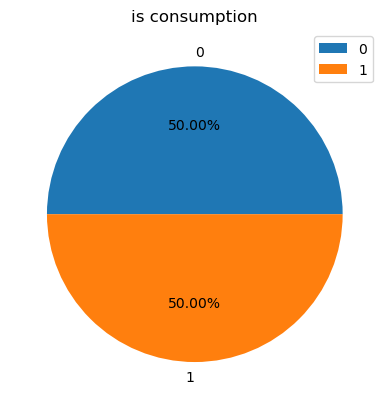

In [11]:
plt.pie(df['is_consumption'].value_counts(), labels=df['is_consumption'].unique(), autopct='%.2f%%')
plt.title('is consumption')
plt.legend()

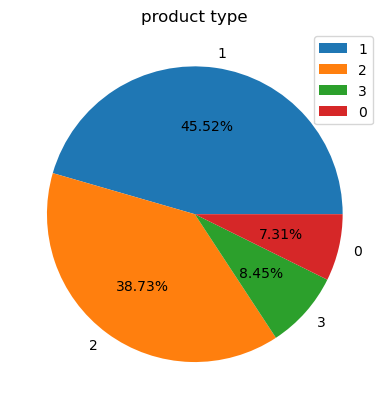

In [12]:
plt.pie(df['product_type'].value_counts(), labels=df['product_type'].unique(), autopct='%.2f%%')
plt.title('product type')
plt.legend()

Text(0.5, 1.0, 'county')

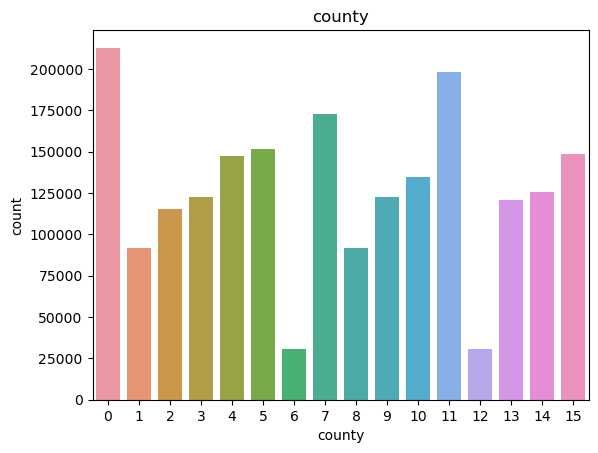

In [13]:
sns.countplot(x='county', data=df)
plt.title('county')

- 데이터 불균형
    - production_type 
    - county

### 에너지 생산량

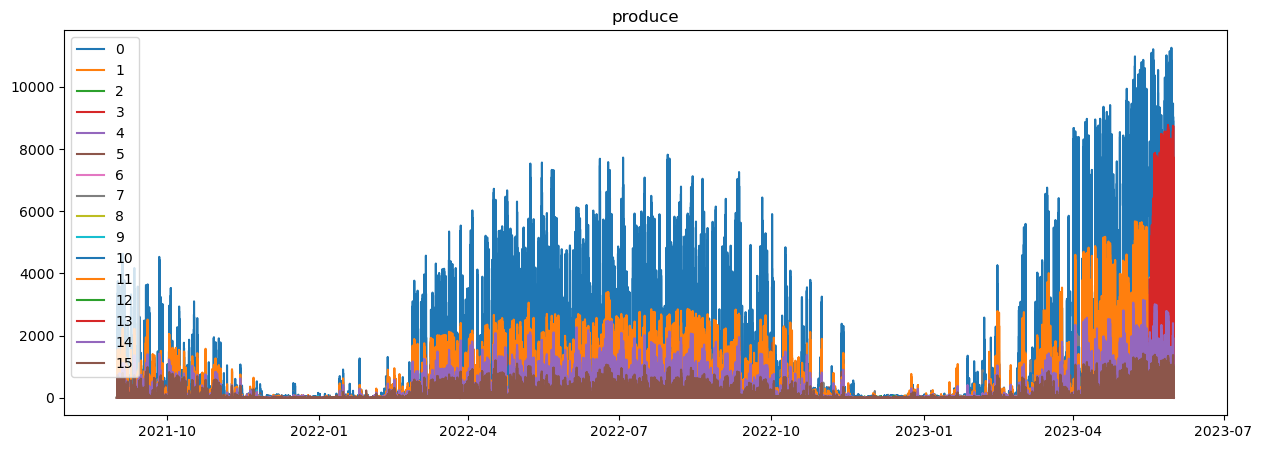

In [14]:
# county별 생산량
df_produce = df[df['is_consumption']==0]
plt.figure(figsize=(15,5))
for i in range(len(df['county'].unique())):
    plt.plot(df_produce[df_produce['county']==i]['target'], label=i)
plt.title('produce')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1500x500 with 0 Axes>

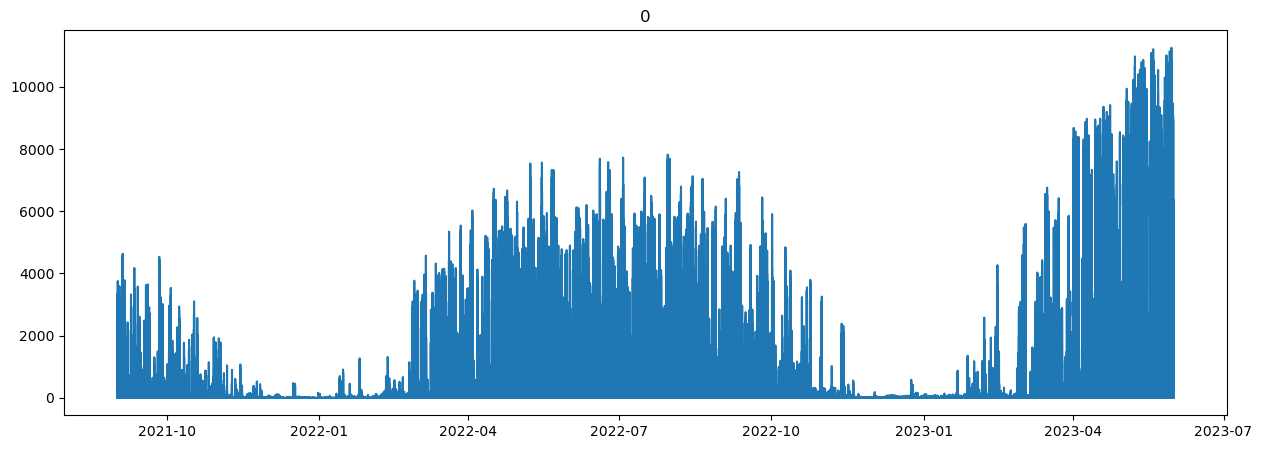

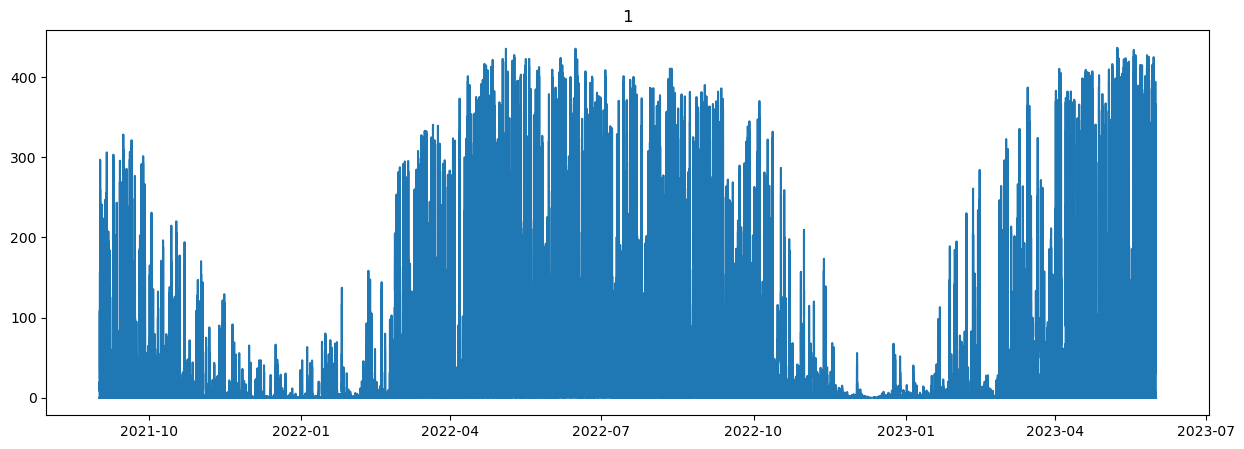

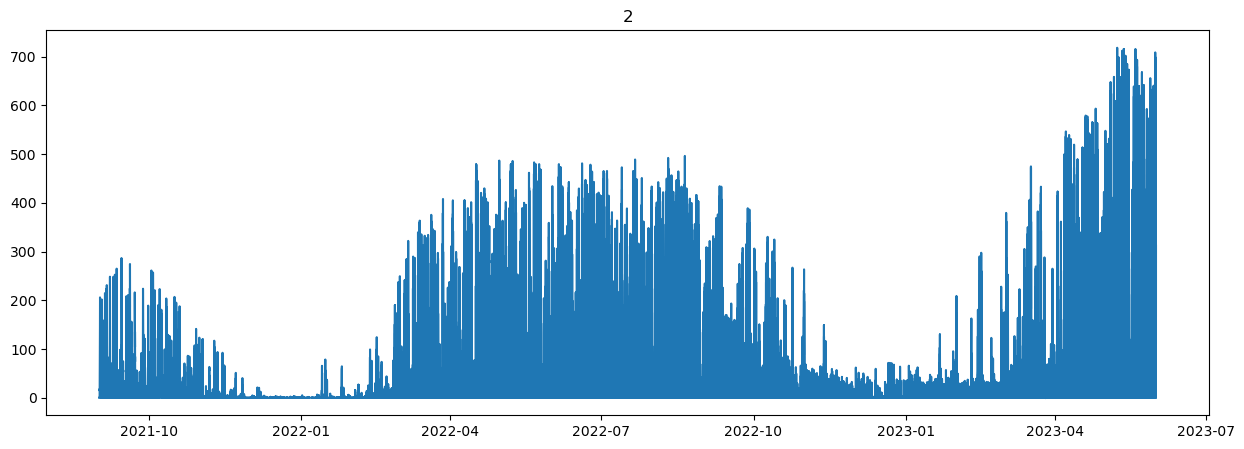

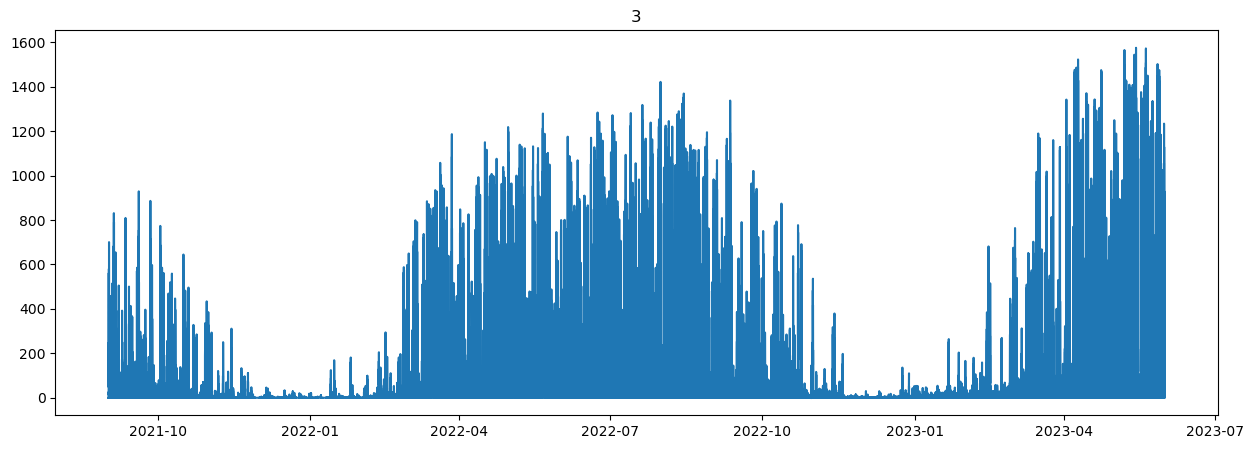

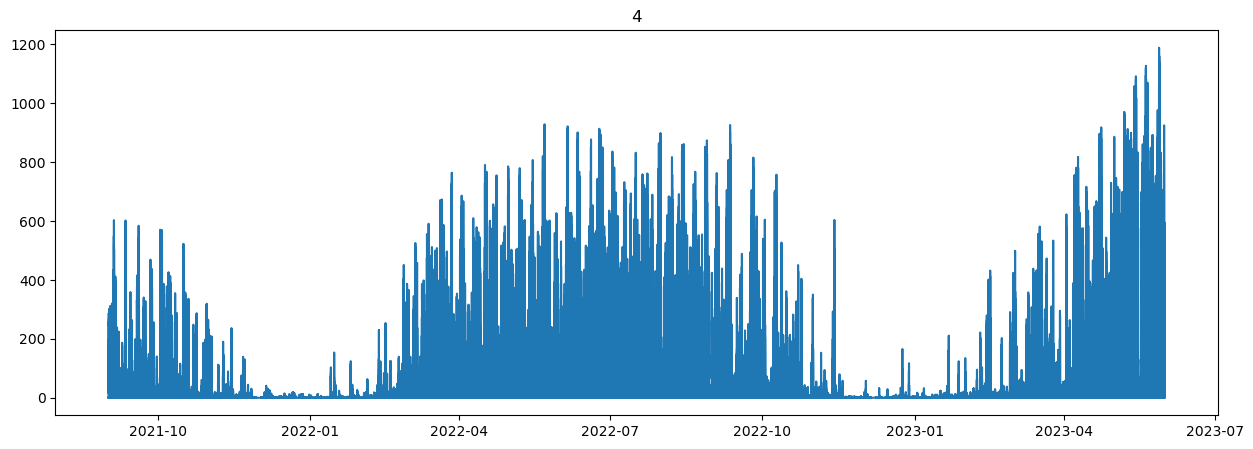

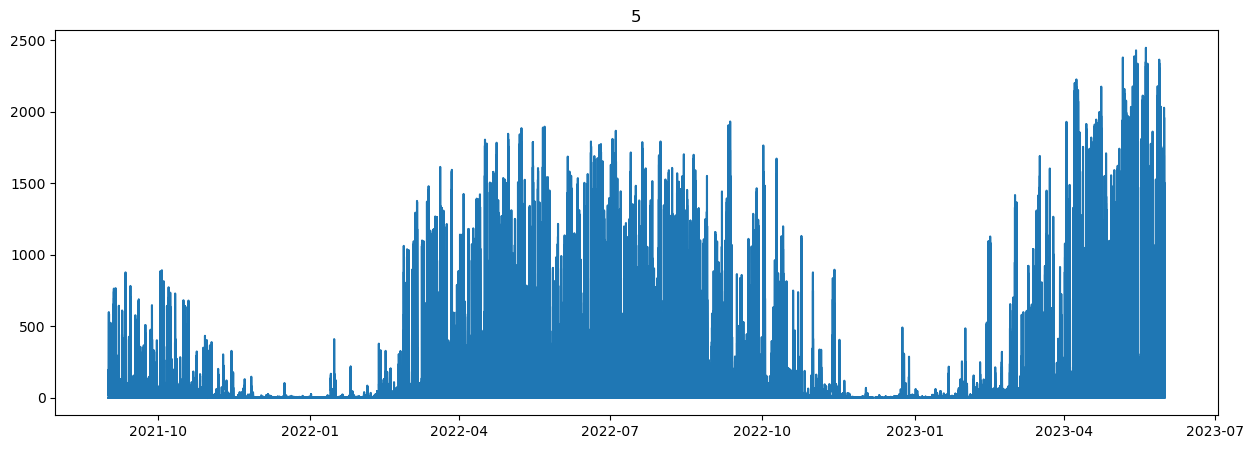

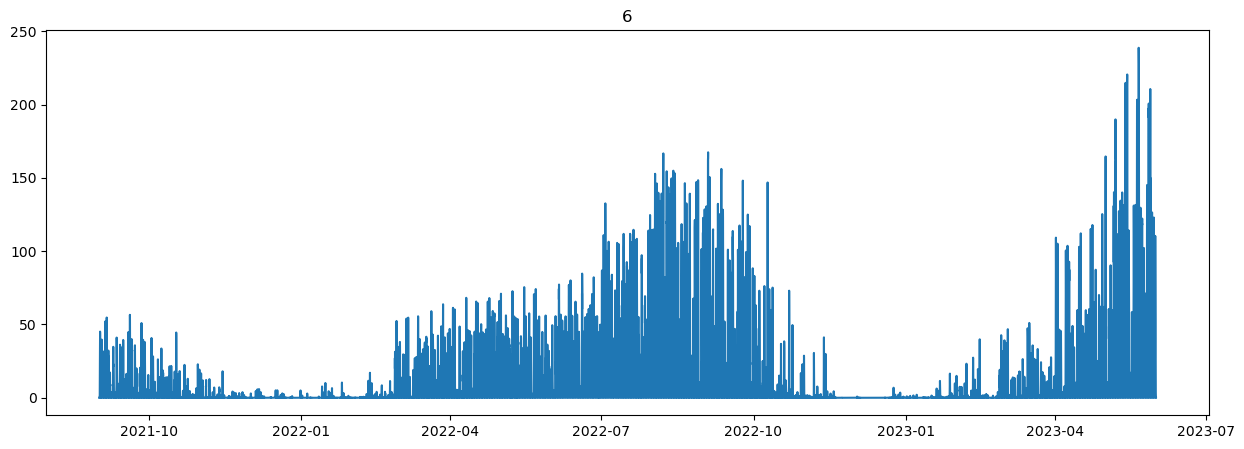

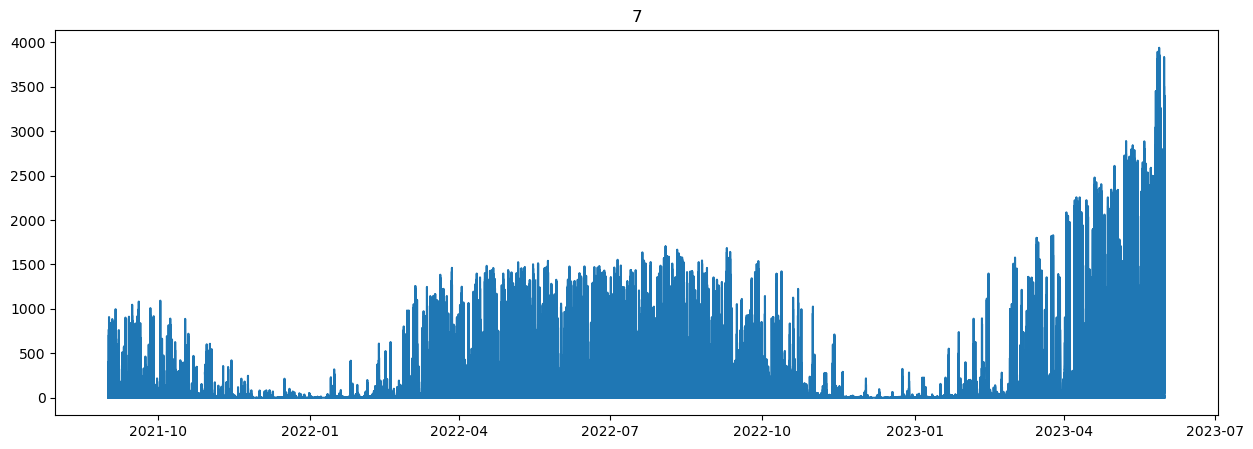

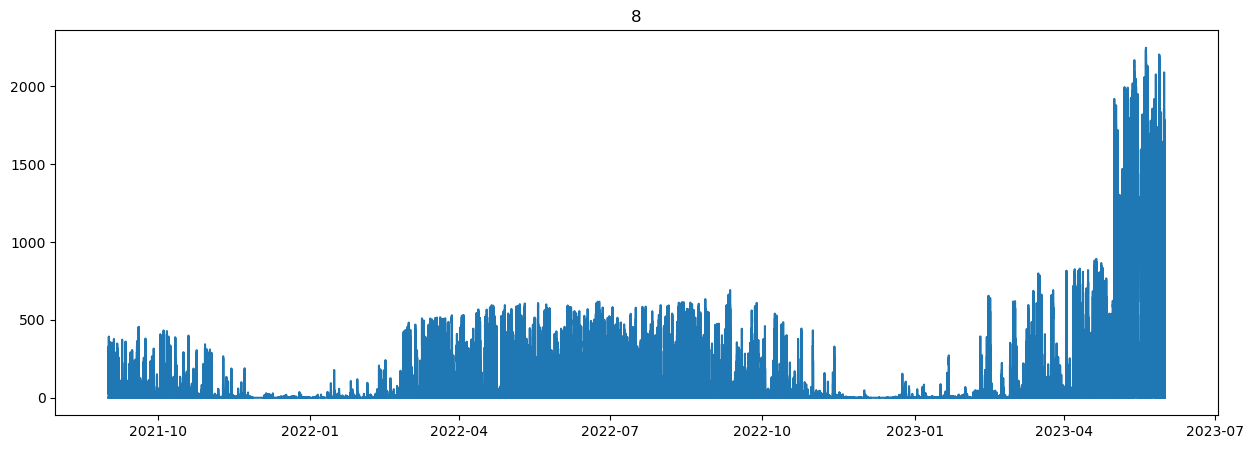

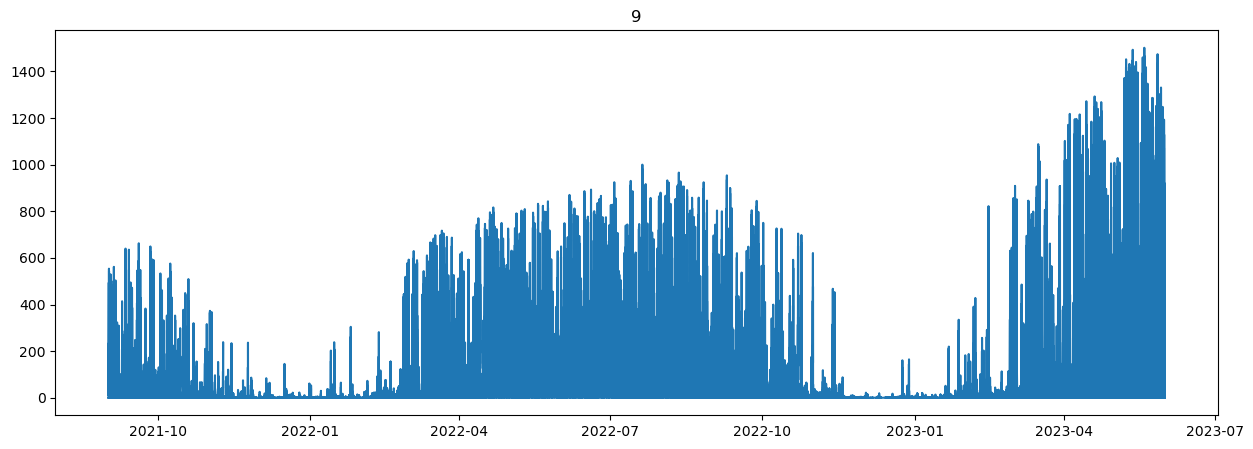

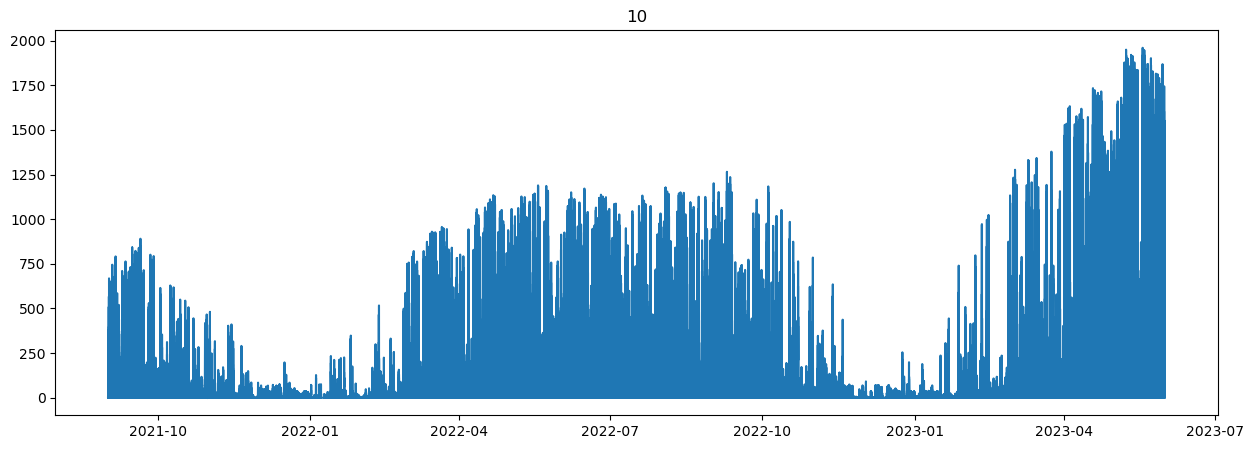

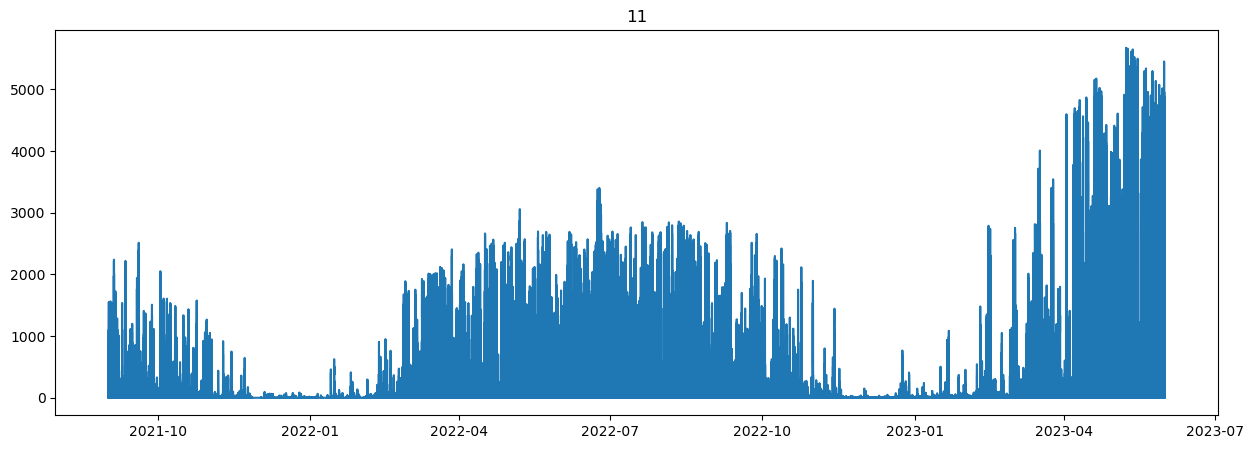

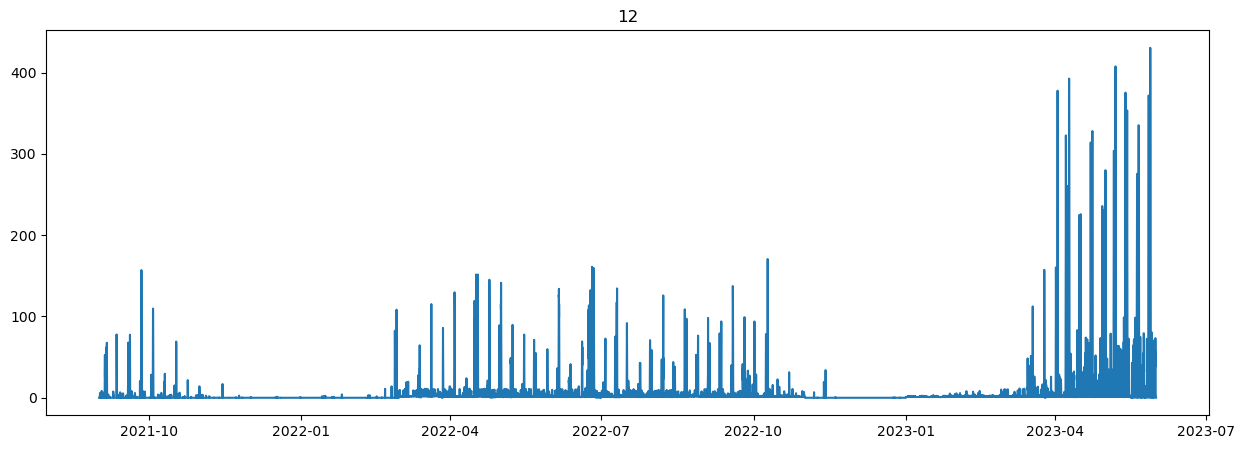

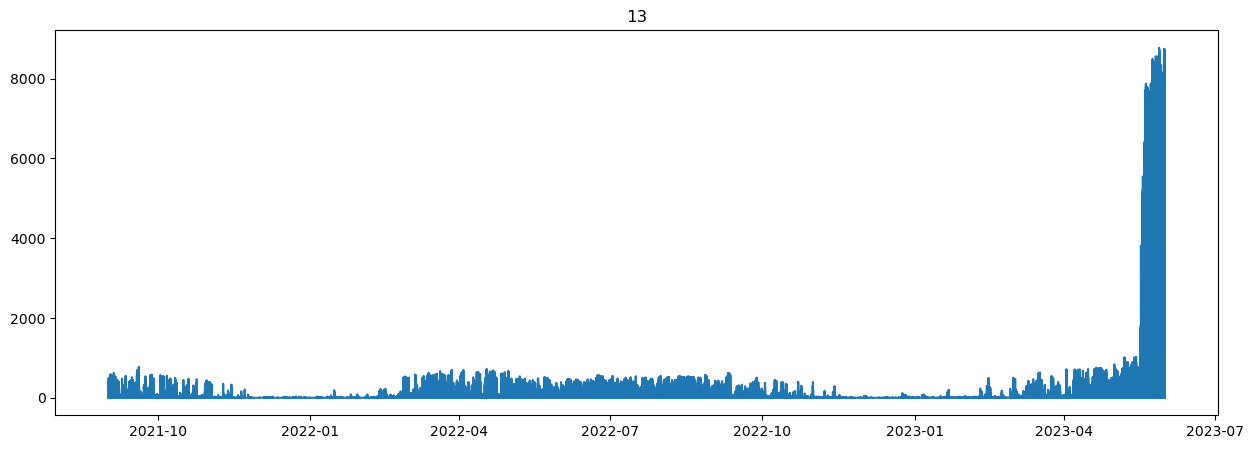

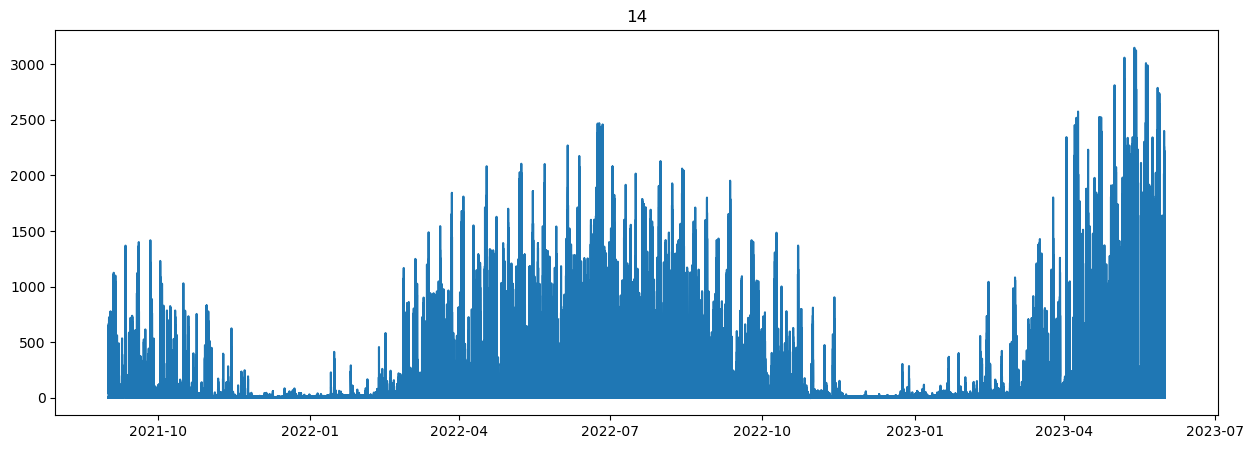

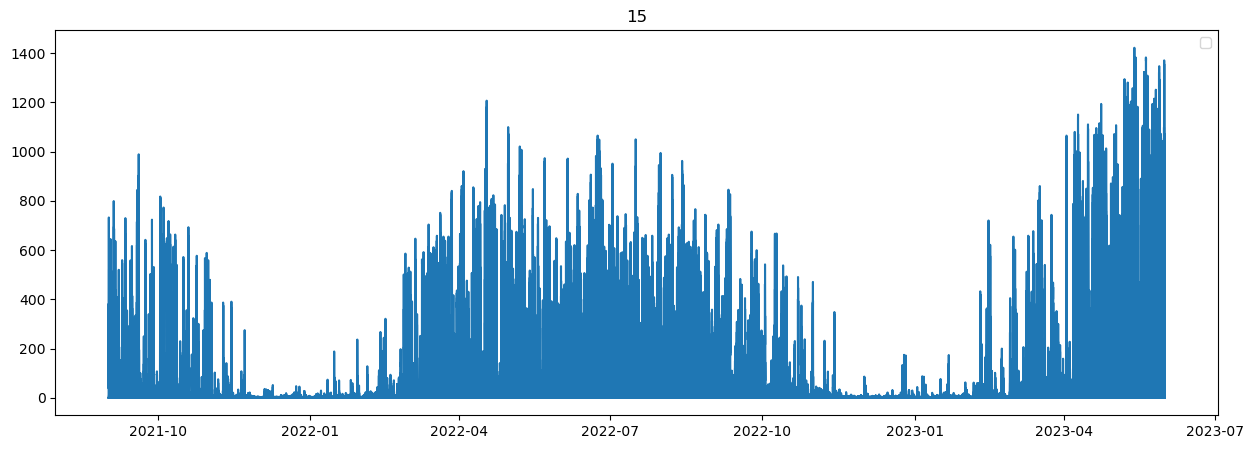

In [15]:
# county별로 살펴보기
df_produce = df[df['is_consumption']==0]
plt.figure(figsize=(15,5))
for i in range(len(df['county'].unique())):
    plt.figure(figsize=(15,5))
    plt.plot(df_produce[df_produce['county']==i]['target'])
    plt.title(i)
plt.legend()

In [16]:
# target값이 0인 행 출력 => null값으로 봐야하는 것인지 확인
df_produce[df_produce['target']==0]

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
datetime,,,,,,,,,
2021-09-01 00:00:00,0,0,2,0.0,0,2021-09-01 00:00:00,0,2,1
2021-09-01 00:00:00,0,1,0,0.0,0,2021-09-01 00:00:00,0,6,3
2021-09-01 00:00:00,0,1,1,0.0,0,2021-09-01 00:00:00,0,8,4
2021-09-01 00:00:00,1,0,1,0.0,0,2021-09-01 00:00:00,0,12,6
2021-09-01 00:00:00,1,1,3,0.0,0,2021-09-01 00:00:00,0,16,8
...,...,...,...,...,...,...,...,...,...
2023-05-31 23:00:00,14,1,1,0.0,0,2023-05-31 23:00:00,637,2018336,55
2023-05-31 23:00:00,14,1,2,0.0,0,2023-05-31 23:00:00,637,2018338,68
2023-05-31 23:00:00,15,1,0,0.0,0,2023-05-31 23:00:00,637,2018346,64


### 에너지 소비량

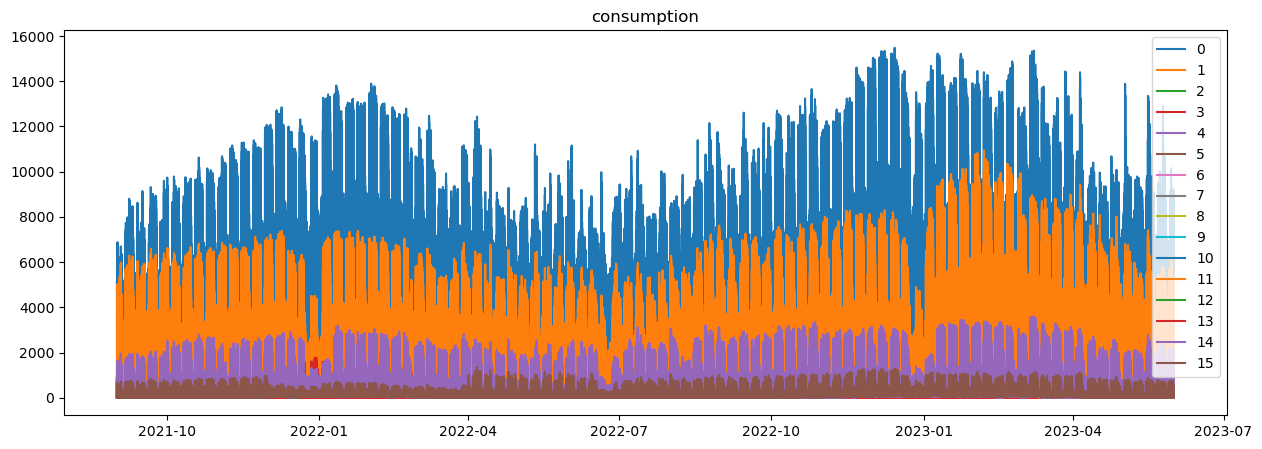

In [17]:
# county별 소비량
df_consumption = df[df['is_consumption']==1]
plt.figure(figsize=(15,5))
for i in range(len(df['county'].unique())):
    plt.plot(df_consumption[df_consumption['county']==i]['target'], label=i)
plt.title('consumption')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1500x500 with 0 Axes>

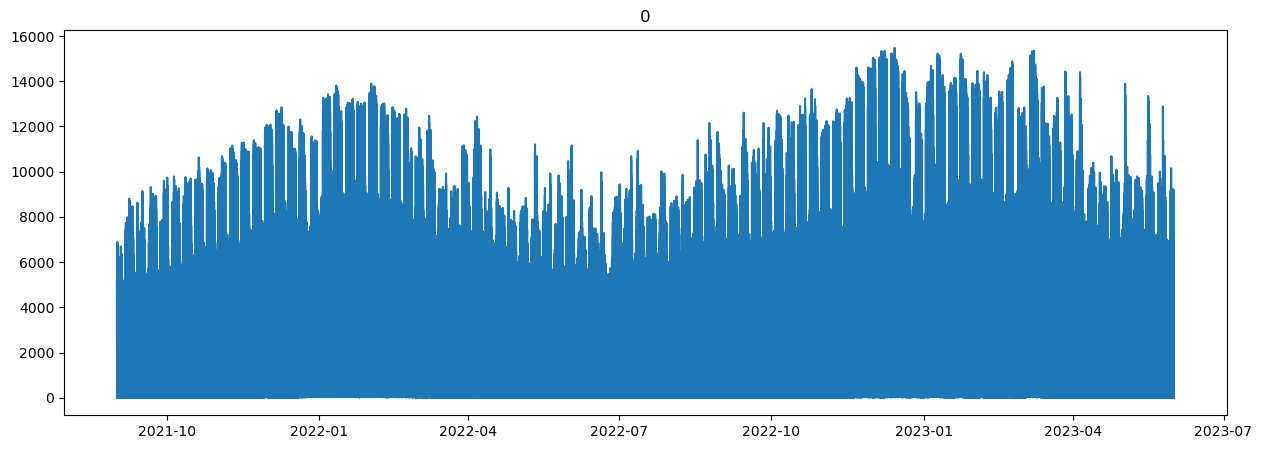

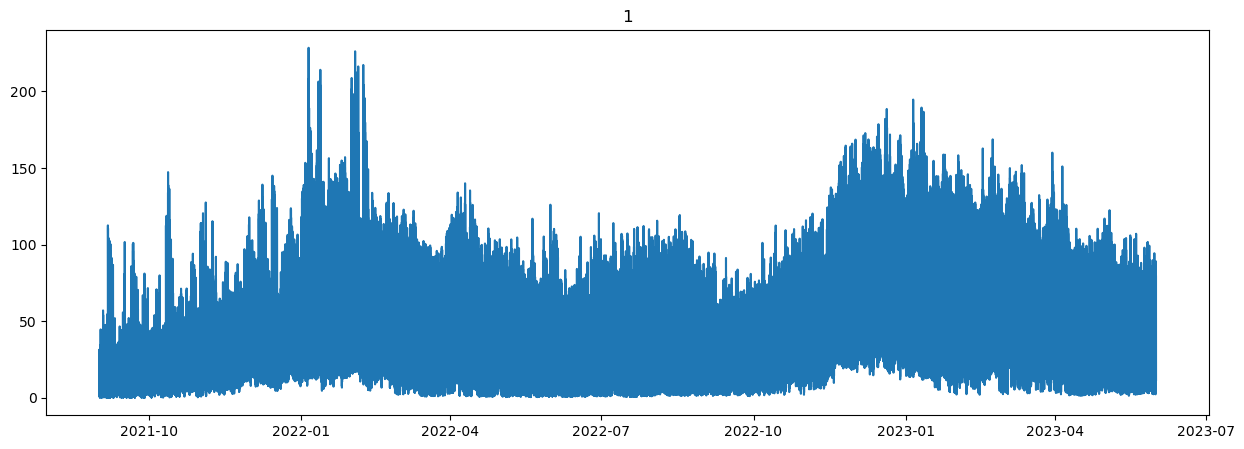

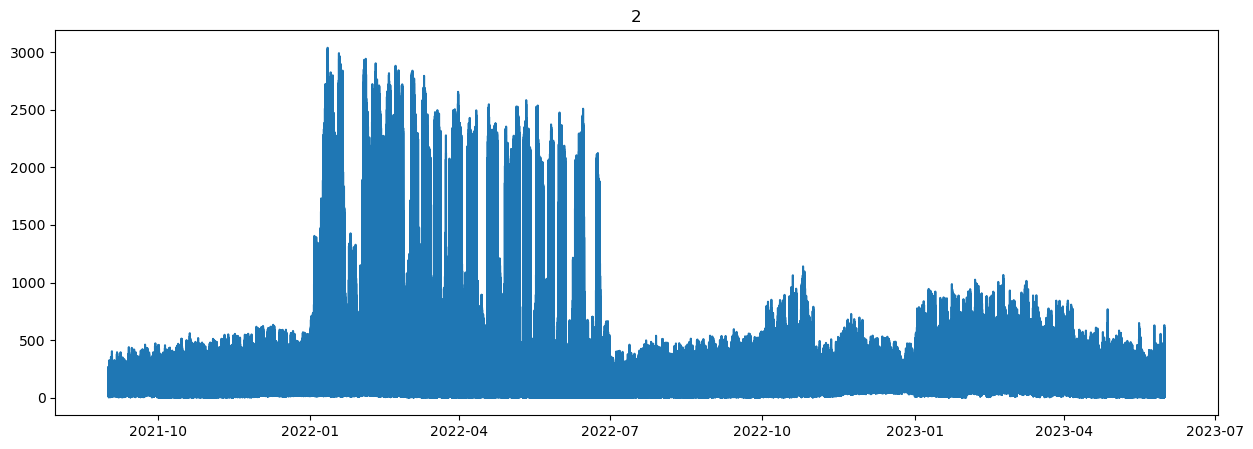

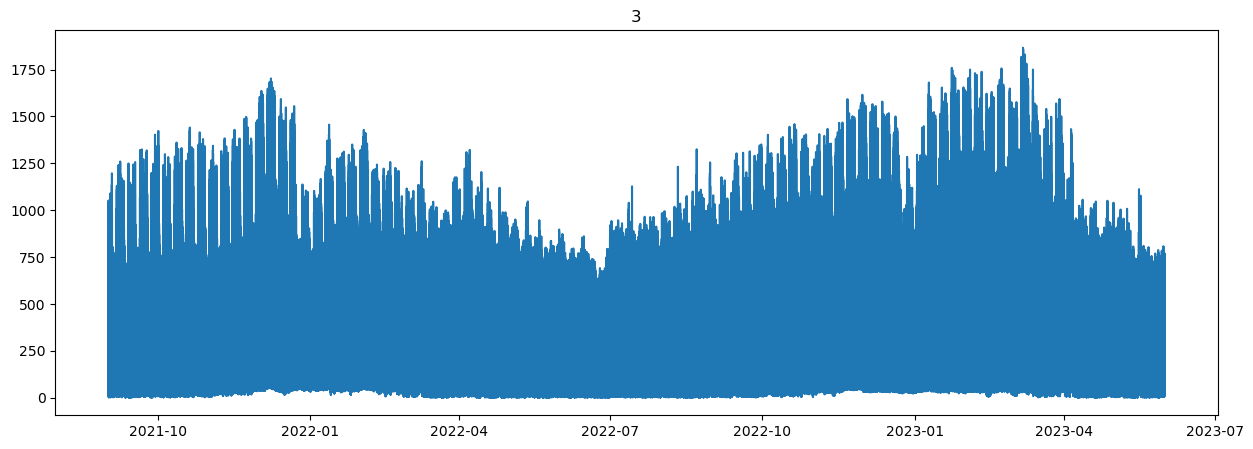

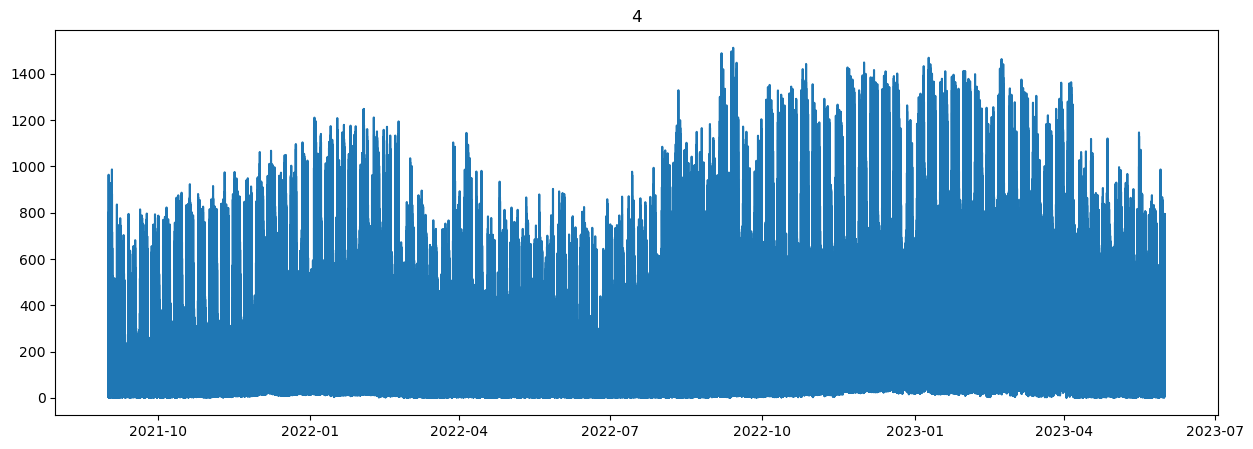

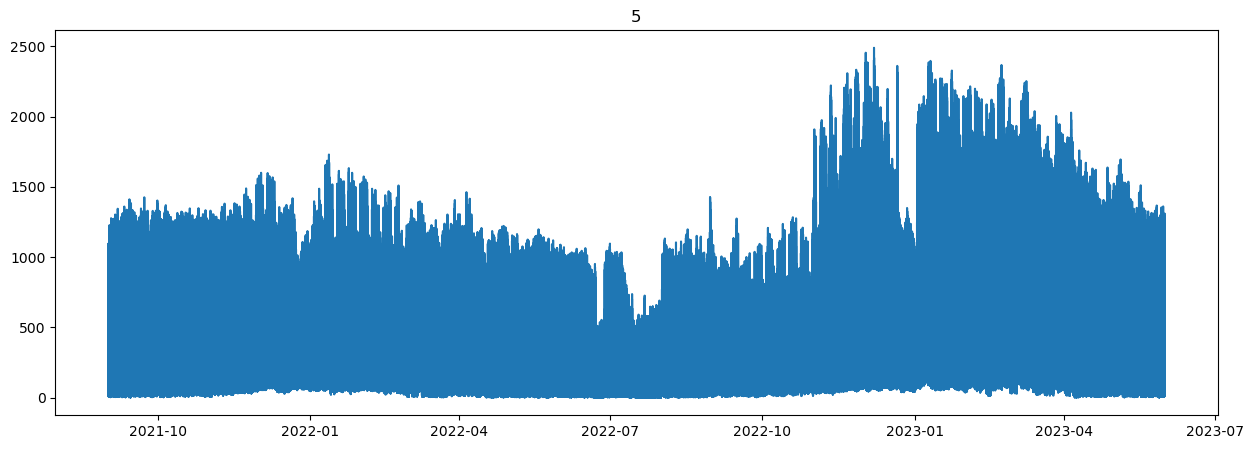

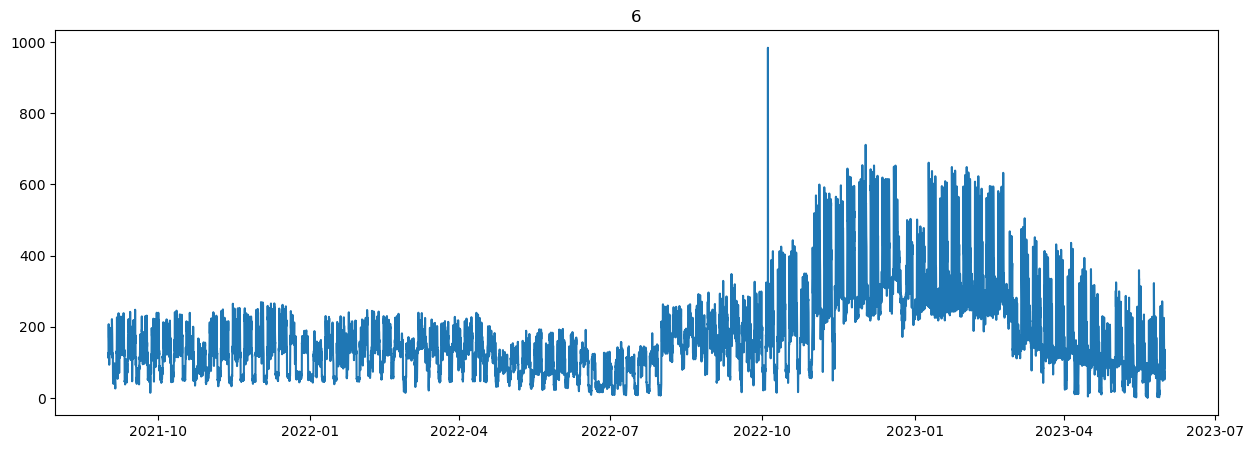

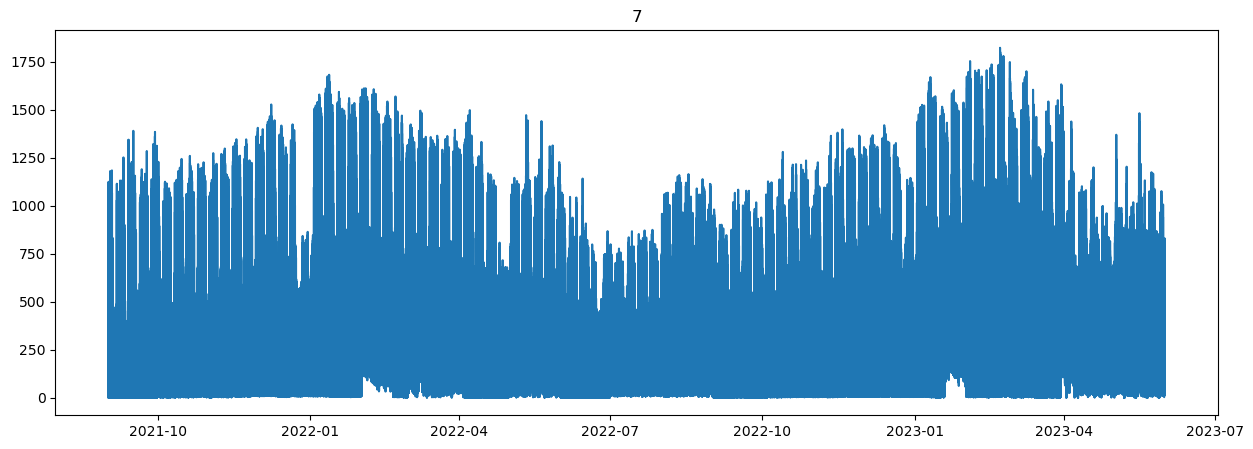

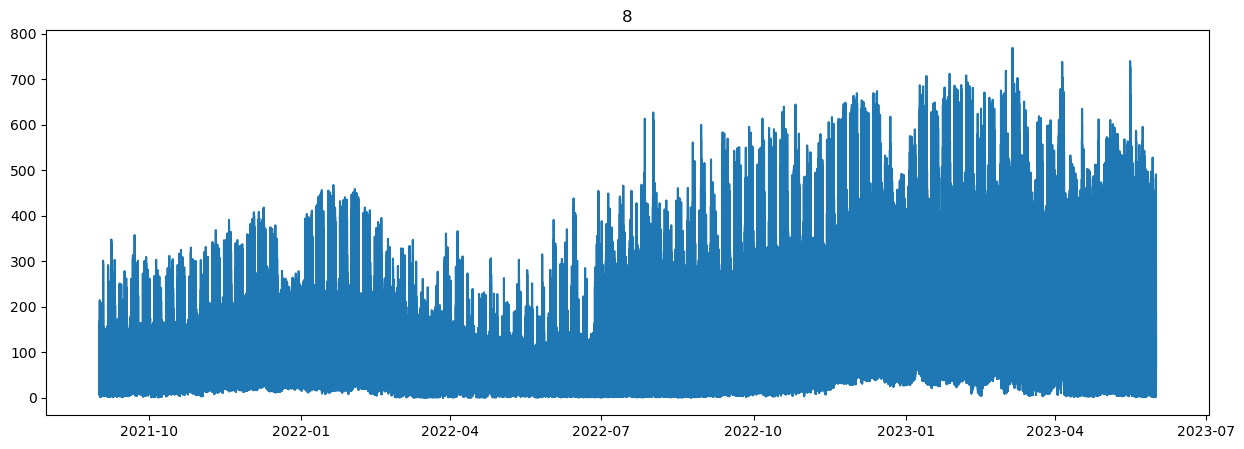

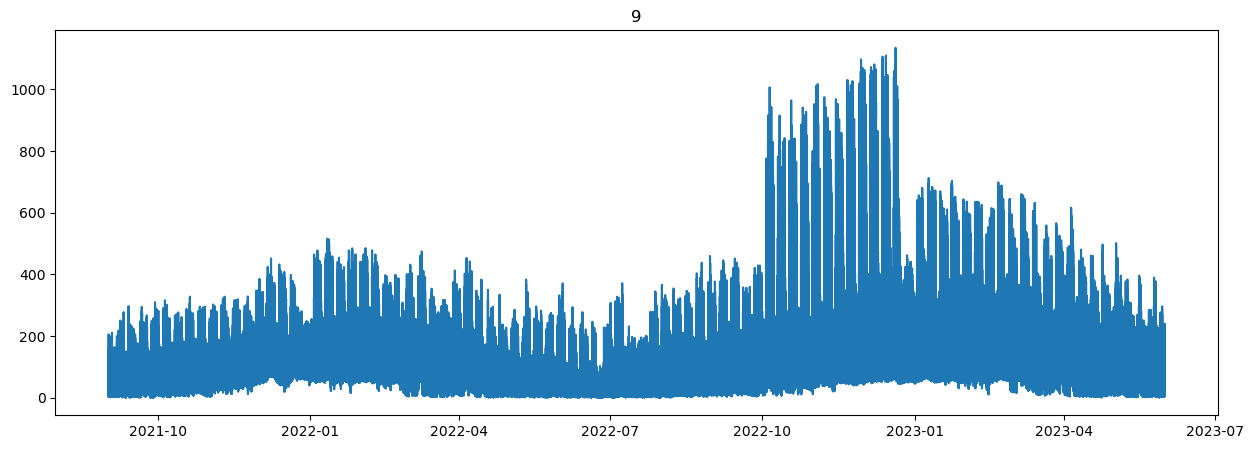

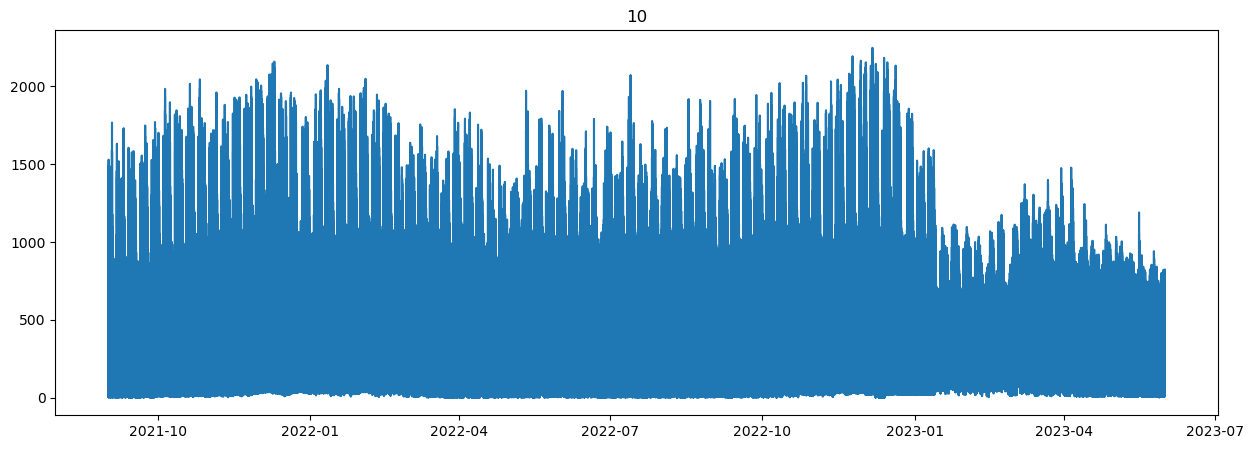

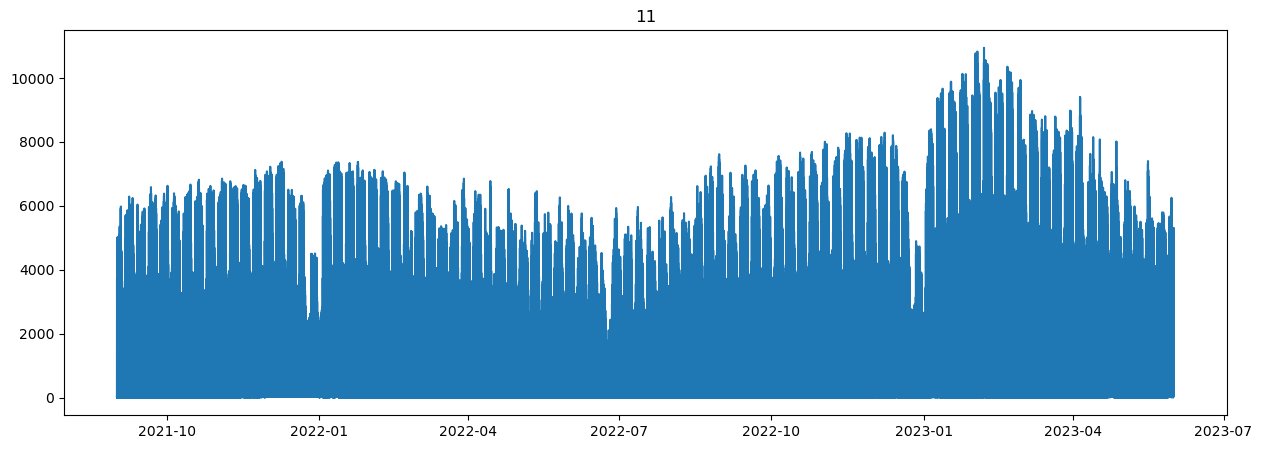

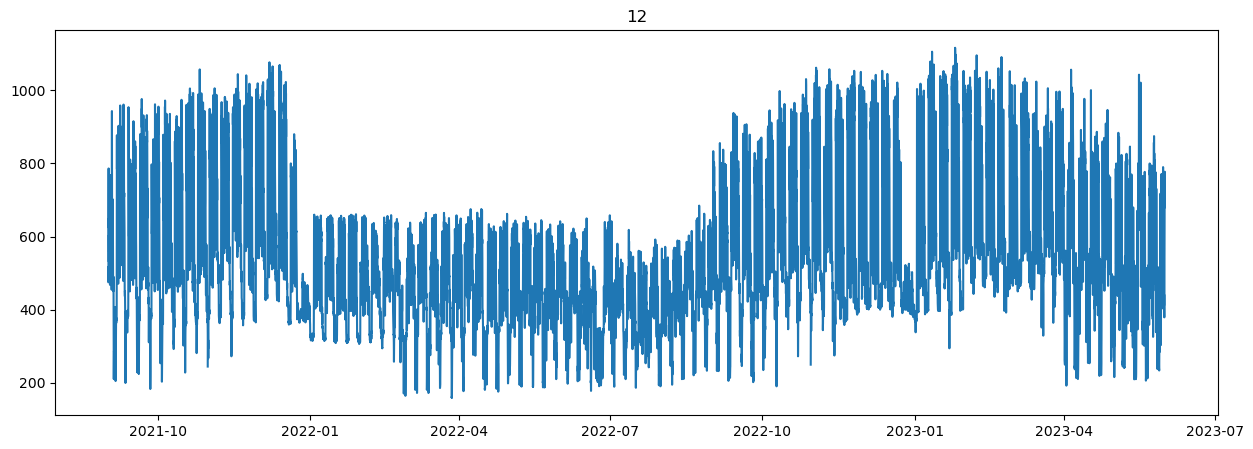

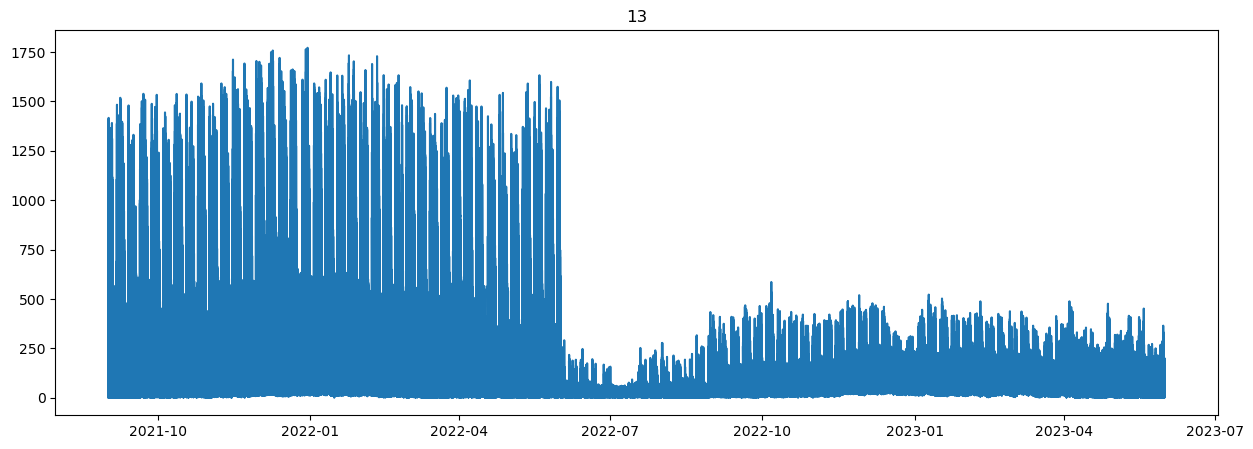

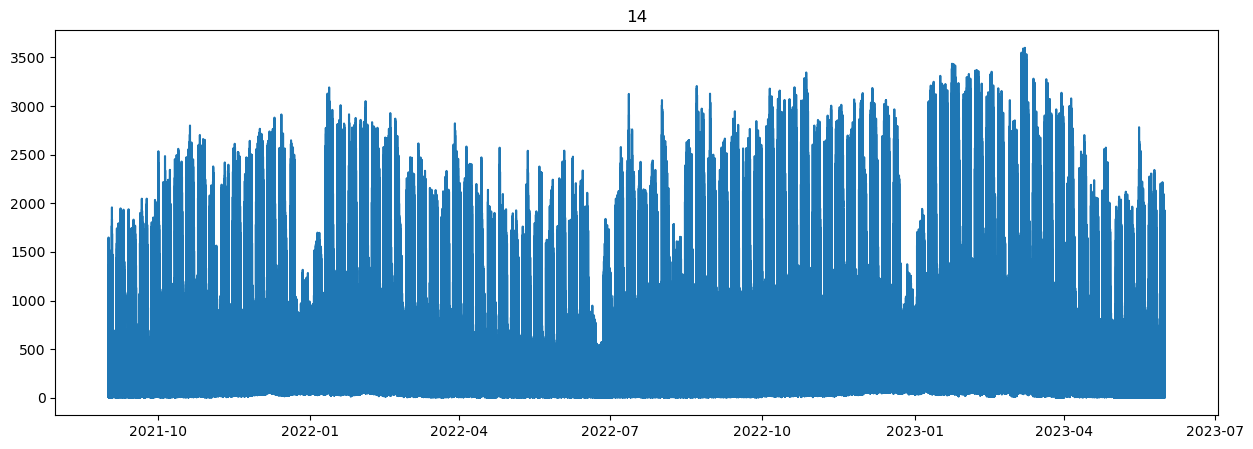

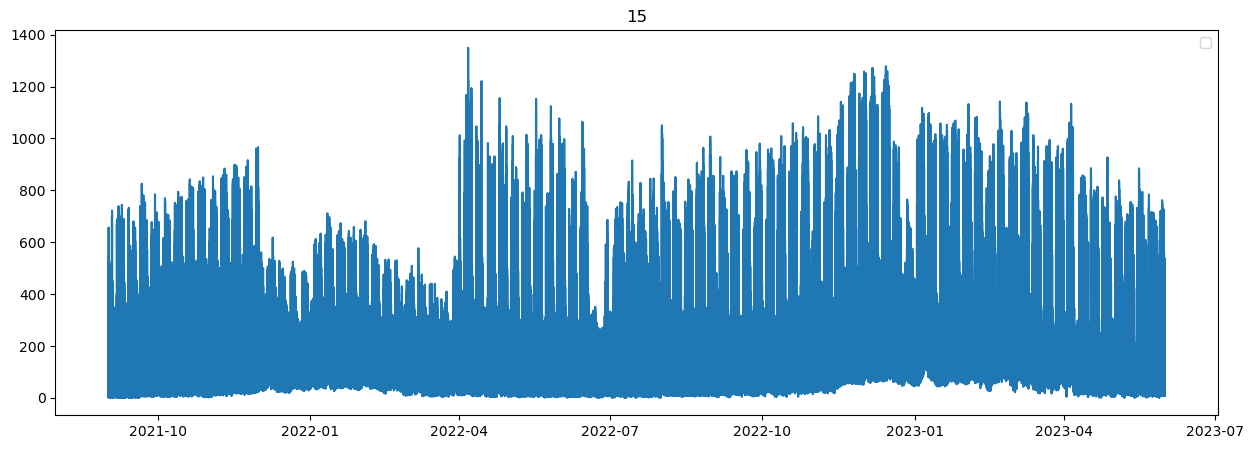

In [18]:
# county별로 살펴보기
df_consumption = df[df['is_consumption']==1]
plt.figure(figsize=(15,5))
for i in range(len(df['county'].unique())):
    plt.figure(figsize=(15,5))
    plt.plot(df_consumption[df_consumption['county']==i]['target'])
    plt.title(i)
plt.legend()

- 이상치
    - county 6에서 2022년 10월

In [19]:
# target값이 0인 행 출력 => null값으로 봐야하는 것인지 확인
df_consumption[df_consumption['target']==0]

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
datetime,,,,,,,,,
2021-09-04 11:00:00,0,1,0,0.0,1,2021-09-04 11:00:00,3,10133,3
2021-09-04 12:00:00,0,1,0,0.0,1,2021-09-04 12:00:00,3,10255,3
2021-09-05 12:00:00,0,1,0,0.0,1,2021-09-05 12:00:00,4,13183,3
2021-09-05 14:00:00,0,1,0,0.0,1,2021-09-05 14:00:00,4,13427,3
2021-09-05 15:00:00,0,1,0,0.0,1,2021-09-05 15:00:00,4,13549,3
...,...,...,...,...,...,...,...,...,...
2023-05-28 12:00:00,0,1,2,0.0,1,2023-05-28 12:00:00,634,2007443,61
2023-05-28 12:00:00,7,1,0,0.0,1,2023-05-28 12:00:00,634,2007495,28
2023-05-28 13:00:00,7,1,0,0.0,1,2023-05-28 13:00:00,634,2007625,28


- 여름: 생산량 ▲, 소비량 ▼
- 겨울: 생산량 ▼, 소비량 ▲

원인 추측

- 날씨적 요인 -> 태양열으로 생산 가능한 에너지 감소, 난방 사용 증가

- 여름에 자체적으로 생산 가능한 에너지 증가 -> 공급되는 전기 사용은 감소?